In [484]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [485]:
warnings.filterwarnings('ignore')

In [486]:
data = load_breast_cancer()

In [487]:
# import data from sklearn
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [488]:
# The outcome variable must be binary
f'The outcome variable value is {np.unique(data.target)[0]} or {np.unique(data.target)[1]} meaning that the tumor could be {(data.target_names[0])} or {(data.target_names[1])}'

'The outcome variable value is 0 or 1 meaning that the tumor could be malignant or benign'

In [489]:
data.data.shape, data.feature_names.shape

((569, 30), (30,))

In [490]:
# make a dataframe from the data
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [491]:
# make the columns as features and investigate at the same time whether they have multicollinearity or not (high correlation)
columns = df.columns.to_list()[:10]
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

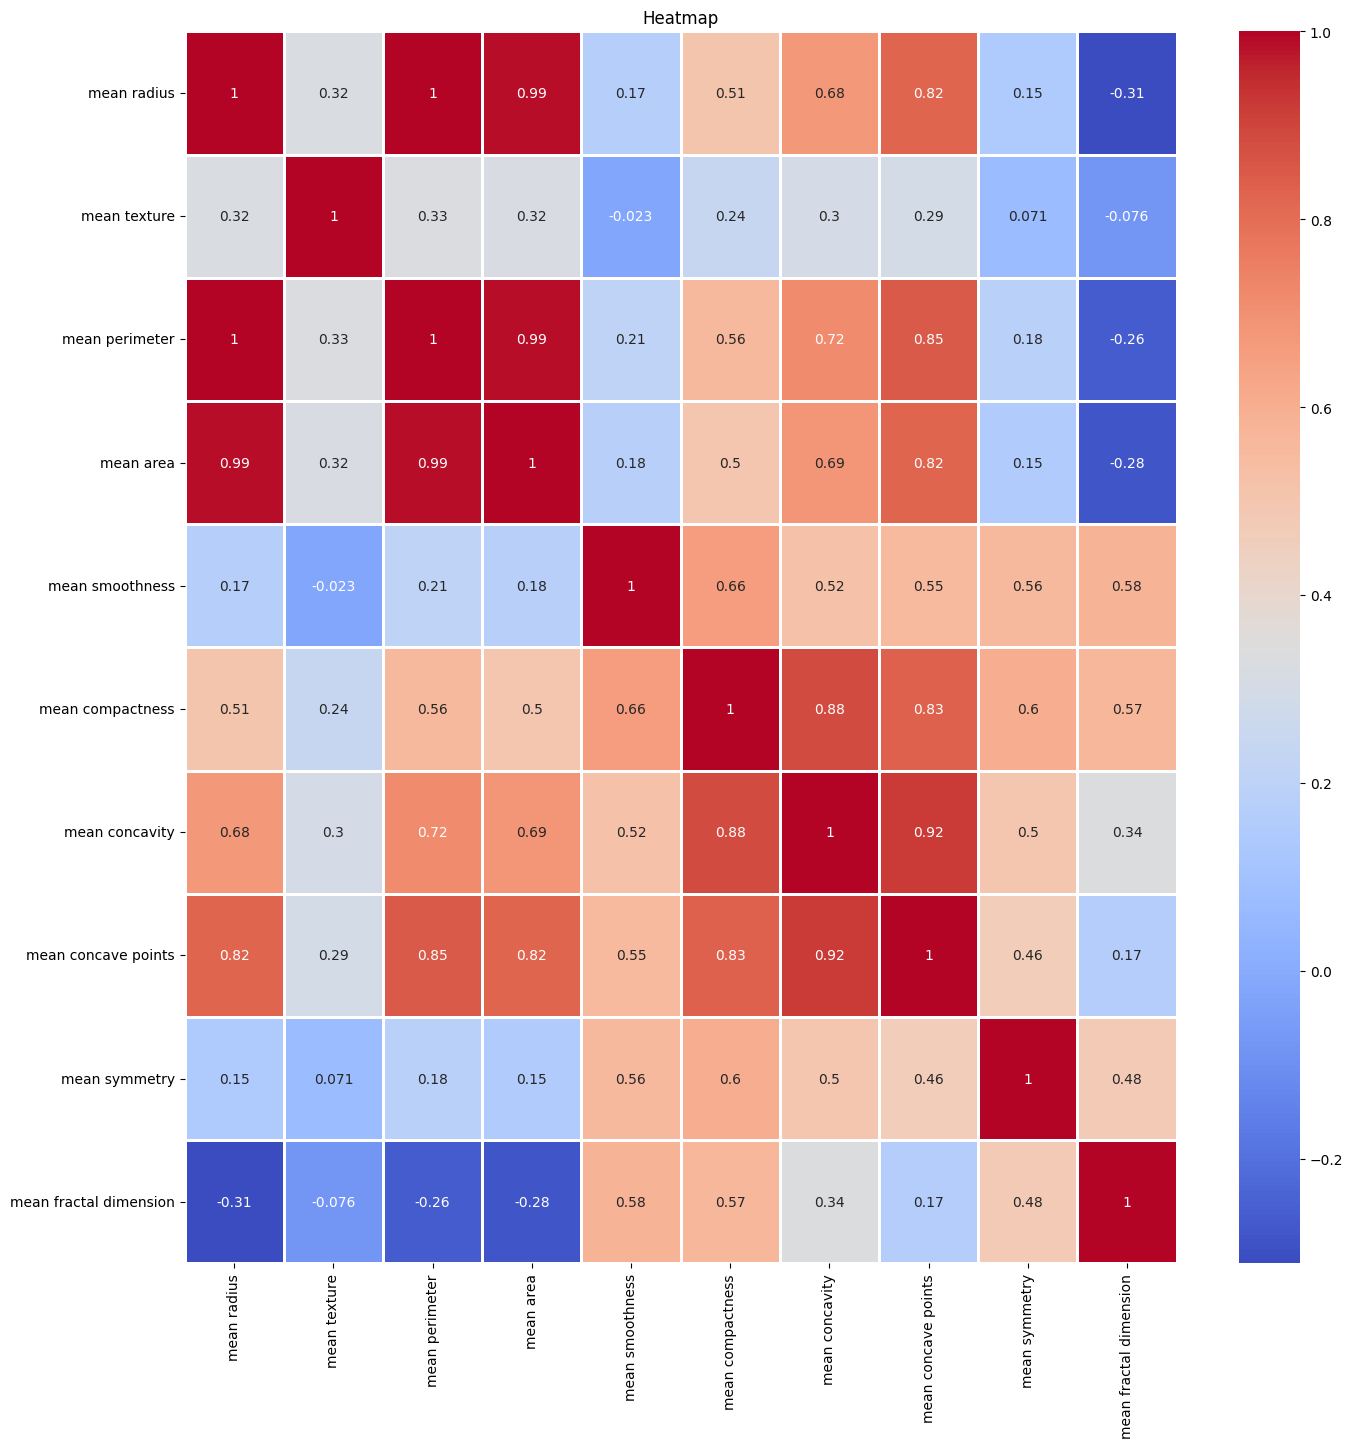

<Figure size 640x480 with 0 Axes>

In [492]:
plt.figure(figsize=[16, 16])
sns.heatmap(df[columns].corr(), annot=True, cmap = 'coolwarm', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.savefig('big_heatmap.png')
plt.show()
plt.clf()

In [493]:
features = list(columns[:2]+columns[4:5]+columns[8:])

In [494]:
# make a heatmap in order to decide what features must be dropped to avoid multicollinearity
plt.figure(figsize=[12, 10])
sns.heatmap(df[features].corr(), annot=True, cmap="mako", linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.savefig('good_heatmap.png')
plt.show()
plt.clf()

In [ ]:
# make X and y as predictor(df for the first run) and outcome(one D array) variables to the model
X = df[features]
y = data.target
type(X), type(y)

In [ ]:
a, b = np.sum(data.target == 0), np.sum(data.target == 1)
print(f'Malingnant tumors number: {a}, benign tumors number: {b}')

In [ ]:
print(f'The sample is imbalanced, the benign tumors rate is {round(100*b/(b+a))}%')

In [ ]:
min_class_size = min(a, b)
# At a maximum, there should be no more than the smallest class size divided by 10 number of features.
max_features = min_class_size / 10
f'''The maximum of the features could be {round(max_features)} and the number of predictor variables is {len(X.columns)
}, so the prerequisite that the sample must be big enough is {max_features > X.columns.nunique()}'''

In [ ]:
# make a pairplot just for fun
plt.figure(figsize=[12, 10])
sns.pairplot(X, diag_kind = "kde")
plt.savefig('pairplot.png')
plt.show()
plt.clf()

In [ ]:
X.head(3)

In [ ]:
np.mean(X['mean radius'])

In [ ]:
# standardize the X values by initalizing the StandardScaler then fit and transform the dataframe (X) back into a 2D array
scaler = StandardScaler()
scaler.fit(X)

In [ ]:
np.mean(X['mean radius'])

In [ ]:
X = scaler.transform(X)

In [ ]:
X

In [ ]:
np.mean(X[:,0])

In [ ]:
type(X), type(y), X.shape, y.shape

In [ ]:
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
print(f'''Train positivity rate: {round(100*np.sum(y_train == 1)/(np.sum(y_train == 1)+np.sum(y_train == 0)))}%
Test positivity rate : {round(100*np.sum(y_test == 1)/(np.sum(y_test == 1)+np.sum(y_test == 0)))}%''')

In [ ]:
# make a LogisticRegression model, fit the training X and y values and then predict y values with using test x values
lrm = LogisticRegression(penalty=None, fit_intercept=True, class_weight='balanced')
model = lrm.fit(X_train, y_train)
threshold = 0.25

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
y_pred_proba[40:45], y_pred[40:45]

In [ ]:
y_test[40:45], y_pred[40:45]

In [ ]:
print('''When Malignant is 0 and Benign is 1 the goal is to maximize the TN not minimize the FN. This means decreasing the threshold will predict
more Malignant tumors which are really Malignants that will save more lives, while we accept that our misdiagnosed cases
(FP meaning that we predict Benign tumors which are Malignants) a little bit will increase. ''')

In [ ]:
# Evaluate the model by using from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
thresholds = [i*1/5 for i in range(1, 5)]
for thresh in reversed(thresholds):
    y_pred = np.where(model.predict_proba(X_test)[:, 1] > thresh, 1, 0)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=',d', cmap='Greens', linewidths=2, linecolor='white',
    xticklabels=['Actual benign', 'Actual malignant'], yticklabels=['Predicted benign', 'Predicted malignant'])
    plt.text(x= 2.25, y=1, s=f'''
        Accuracy rate: {round(100*accuracy_score(y_test, y_pred))}%
        Precision rate: {round(100*precision_score(y_test, y_pred))}%
        Recall rate: {round(100*recall_score(y_test, y_pred))}%''')
    plt.title(f'Confusion matrix - prediction threshold: {thresh}')
    plt.show()
    plt.clf()
print('\nConfusion matrix represents true positives, false positives in the first row, and false negatives, true negatives in the second row.')

### Conclusion: 
`We can see that using lower prediction threshold means that we decrease the number of false negatives which is not very important, 
because this means that we predict malignant while they are not. However, we also maximizing the true negatives meaning that we predict as much malignant tumors as possible from the actual ones.`

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure(figsize=[12, 10])
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
idx = list(range(len(thresholds)))[1::4]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))

clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

In [ ]:
scores_and_k = []
accuracies = []
for k in range(1, 101):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  a = classifier.score(X_test, y_test)
  scores_and_k.append([a, k])
  accuracies.append(a)
print(max(scores_and_k))
k_list = list(range(1, 101))
plt.plot(k_list, accuracies)
plt.xlabel('Number of "k" nearest neighbors')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.plot(max(scores_and_k)[1], max(scores_and_k)[0], '-*')
plt.show()
plt.clf()